# conv2D layer tuning on CIFAR-10 Dataset

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from matplotlib import pyplot as plt
from keras import regularizers
from keras.constraints import max_norm

Using TensorFlow backend.


In [0]:
num_classes = 10
data_augmentation = True
num_predictions = 20

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
x_train = x_train[0:20000]
y_train = y_train[0:20000]

In [0]:
print(x_train.shape[0], 'train samples')

20000 train samples


In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Model 1 with strides 2,2 and padding = same with Batch = 128 , epochs = 100

In [0]:
def model1(model,batch_size,epochs):
    
        model.add(Conv2D(32, (3, 3), strides=(2, 2) ,padding='same',input_shape=x_train.shape[1:]))
        model.add(Activation('relu'))
        
        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Conv2D(64, (3, 3),strides=(2, 2), padding='same'))
        model.add(Activation('relu'))
        
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(rate = 0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        
        opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
            

        # Let's train the model
        model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
        
        history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
        return history

In [0]:
tmodel1 = Sequential()
train_model1 = model1(tmodel1,128,100)

Train on 20000 samples, validate on 10000 samples
Epoch 1/100
20000/20000 [==============================] - 65s 3ms/step - loss: 2.2716 - acc: 0.1256 - val_loss: 2.1330 - val_acc: 0.1918
Epoch 2/100
20000/20000 [==============================] - 54s 3ms/step - loss: 2.0902 - acc: 0.1981 - val_loss: 1.9928 - val_acc: 0.2499
Epoch 3/100
20000/20000 [==============================] - 56s 3ms/step - loss: 1.9917 - acc: 0.2358 - val_loss: 1.8898 - val_acc: 0.3106
Epoch 4/100
20000/20000 [==============================] - 56s 3ms/step - loss: 1.9103 - acc: 0.2725 - val_loss: 1.8061 - val_acc: 0.3469
Epoch 5/100
20000/20000 [==============================] - 56s 3ms/step - loss: 1.8542 - acc: 0.2946 - val_loss: 1.7482 - val_acc: 0.3632
Epoch 6/100
20000/20000 [==============================] - 55s 3ms/step - loss: 1.8037 - acc: 0.3168 - val_loss: 1.7191 - val_acc: 0.3632
Epoch 7/100
20000/20000 [==============================] - 56s 3ms/step - loss: 1.7758 - acc: 0.3263 - val_loss: 1.6831 - 

### Model 3 with strides 2,2 and padding = same with Batch = 64 , epochs = 30

In [0]:
def model3(model,batch_size,epochs):
    
        model.add(Conv2D(32, (3, 3), padding='same',
                         input_shape=x_train.shape[1:],activation='relu'))

        model.add(Conv2D(32, (3,3), strides=(2, 2), padding='same'))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
        model.add(Activation('relu'))


        model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))
        
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(rate = 0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        
        opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
            

        # Let's train the model
        model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
        
        history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
        return history

In [0]:
tmodel3 = Sequential()
train_model3 = model3(tmodel3,64,30)

Train on 20000 samples, validate on 10000 samples
Epoch 1/30
20000/20000 [==============================] - 59s 3ms/step - loss: 2.2354 - acc: 0.1449 - val_loss: 2.0523 - val_acc: 0.2435
Epoch 2/30
20000/20000 [==============================] - 58s 3ms/step - loss: 2.0391 - acc: 0.2269 - val_loss: 1.9203 - val_acc: 0.2983
Epoch 3/30
20000/20000 [==============================] - 57s 3ms/step - loss: 1.9021 - acc: 0.2857 - val_loss: 1.7566 - val_acc: 0.3586
Epoch 4/30
20000/20000 [==============================] - 58s 3ms/step - loss: 1.7995 - acc: 0.3215 - val_loss: 1.6783 - val_acc: 0.3842
Epoch 5/30
20000/20000 [==============================] - 58s 3ms/step - loss: 1.7453 - acc: 0.3404 - val_loss: 1.6412 - val_acc: 0.3984
Epoch 6/30
20000/20000 [==============================] - 57s 3ms/step - loss: 1.7039 - acc: 0.3643 - val_loss: 1.5919 - val_acc: 0.4144
Epoch 7/30
20000/20000 [==============================] - 56s 3ms/step - loss: 1.6671 - acc: 0.3752 - val_loss: 1.5708 - val_acc

### Model 2 with strides 2,2 and padding = same with Batch = 32 , epochs = 50

In [0]:
def model3(model,batch_size,epochs):
    
        model.add(Conv2D(32, (3, 3), padding='same',
                         input_shape=x_train.shape[1:],activation='relu'))

        model.add(Conv2D(32, (3,3), strides=(2, 2), padding='same'))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
        model.add(Activation('relu'))


        model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))
        
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(rate = 0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        
        opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
            

        # Let's train the model
        model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
        
        history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
        return history

In [9]:
tmodel3 = Sequential()
train_model3 = model3(tmodel3,32,50)

Train on 20000 samples, validate on 10000 samples
Epoch 1/50
20000/20000 [==============================] - 66s 3ms/step - loss: 2.1860 - acc: 0.1668 - val_loss: 2.0135 - val_acc: 0.2469
Epoch 2/50
20000/20000 [==============================] - 65s 3ms/step - loss: 1.9549 - acc: 0.2655 - val_loss: 1.7745 - val_acc: 0.3367
Epoch 3/50
20000/20000 [==============================] - 64s 3ms/step - loss: 1.7946 - acc: 0.3212 - val_loss: 1.6898 - val_acc: 0.3794
Epoch 4/50
20000/20000 [==============================] - 65s 3ms/step - loss: 1.7184 - acc: 0.3495 - val_loss: 1.6018 - val_acc: 0.4119
Epoch 5/50
20000/20000 [==============================] - 65s 3ms/step - loss: 1.6537 - acc: 0.3771 - val_loss: 1.5255 - val_acc: 0.4362
Epoch 6/50
20000/20000 [==============================] - 65s 3ms/step - loss: 1.5988 - acc: 0.4073 - val_loss: 1.4756 - val_acc: 0.4630
Epoch 7/50
20000/20000 [==============================] - 66s 3ms/step - loss: 1.5570 - acc: 0.4227 - val_loss: 1.4574 - val_acc

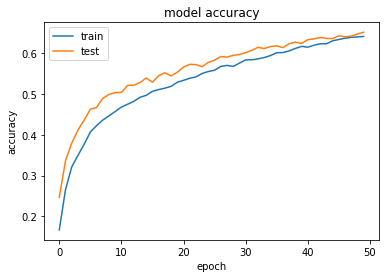

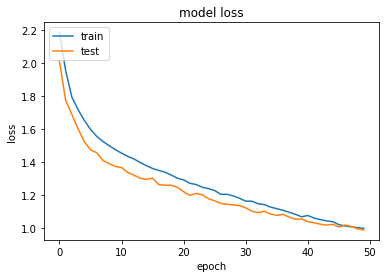

In [10]:
# summarize history for accuracy
plt.plot(train_model3.history['acc'])
plt.plot(train_model3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model3.history['loss'])
plt.plot(train_model3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model 4 with strides 1,1 and padding = valid with Batch = 64 , epochs = 60

In [0]:
def model4(model,batch_size,epochs):
    
        model.add(Conv2D(32, (3, 3), padding='valid',
                         input_shape=x_train.shape[1:],activation='relu'))

        model.add(Conv2D(32, (3,3), strides=(1, 1), padding='valid'))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Conv2D(64, (3,3), strides=(1, 1), padding='valid'))
        model.add(Activation('relu'))


        model.add(Conv2D(64, (3,3), strides=(1, 1), padding='valid'))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))
        
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(rate = 0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        
        opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
            

        # Let's train the model
        model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
        
        history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
        return history

In [0]:
tmodel4 = Sequential()
train_model4 = model4(tmodel4,64,60)

W0628 07:58:53.159946 140643670370176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 07:58:53.212022 140643670370176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 07:58:53.217673 140643670370176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0628 07:58:53.287513 140643670370176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0628 07:58:53.290984 140643670370176 deprecation_wrapp

Train on 20000 samples, validate on 10000 samples
Epoch 1/60
20000/20000 [==============================] - 163s 8ms/step - loss: 2.1031 - acc: 0.2064 - val_loss: 1.8190 - val_acc: 0.3531
Epoch 2/60
20000/20000 [==============================] - 162s 8ms/step - loss: 1.7766 - acc: 0.3428 - val_loss: 1.6300 - val_acc: 0.4069
Epoch 3/60
20000/20000 [==============================] - 161s 8ms/step - loss: 1.6492 - acc: 0.3926 - val_loss: 1.5270 - val_acc: 0.4423
Epoch 4/60
20000/20000 [==============================] - 162s 8ms/step - loss: 1.5629 - acc: 0.4262 - val_loss: 1.4586 - val_acc: 0.4671
Epoch 5/60
20000/20000 [==============================] - 163s 8ms/step - loss: 1.4986 - acc: 0.4529 - val_loss: 1.4280 - val_acc: 0.4888
Epoch 6/60
20000/20000 [==============================] - 160s 8ms/step - loss: 1.4523 - acc: 0.4692 - val_loss: 1.3685 - val_acc: 0.5083
Epoch 7/60
20000/20000 [==============================] - 162s 8ms/step - loss: 1.4060 - acc: 0.4903 - val_loss: 1.3681 - 

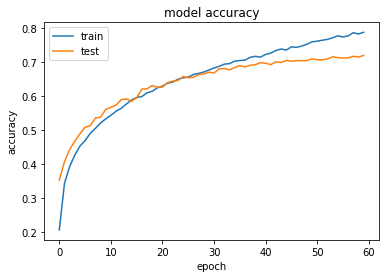

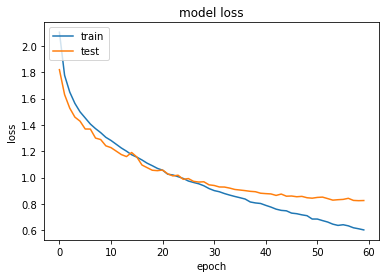

In [0]:
# summarize history for accuracy
plt.plot(train_model4.history['acc'])
plt.plot(train_model4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model4.history['loss'])
plt.plot(train_model4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model with strides 1,1 and padding = same with Batch = 64 , epochs = 60

In [0]:
def model5(model,batch_size,epochs):
    
        model.add(Conv2D(32, (3, 3), padding='same',
                         input_shape=x_train.shape[1:],activation='relu'))

        model.add(Conv2D(32, (3,3), strides=(1, 1), padding='same'))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Conv2D(64, (3,3), strides=(1, 1), padding='same'))
        model.add(Activation('relu'))


        model.add(Conv2D(64, (3,3), strides=(1, 1), padding='same'))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))
        
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(rate = 0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        
        opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
            

        # Let's train the model
        model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
        
        history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
        return history

In [0]:
tmodel5 = Sequential()
train_model5 = model5(tmodel5,64,60)

Train on 20000 samples, validate on 10000 samples
Epoch 1/60
20000/20000 [==============================] - 263s 13ms/step - loss: 2.0378 - acc: 0.2460 - val_loss: 1.7486 - val_acc: 0.3907
Epoch 2/60
20000/20000 [==============================] - 261s 13ms/step - loss: 1.7019 - acc: 0.3861 - val_loss: 1.5717 - val_acc: 0.4389
Epoch 3/60
20000/20000 [==============================] - 261s 13ms/step - loss: 1.5802 - acc: 0.4282 - val_loss: 1.4755 - val_acc: 0.4605
Epoch 4/60
20000/20000 [==============================] - 262s 13ms/step - loss: 1.5066 - acc: 0.4526 - val_loss: 1.4090 - val_acc: 0.4917
Epoch 5/60
20000/20000 [==============================] - 262s 13ms/step - loss: 1.4386 - acc: 0.4798 - val_loss: 1.3665 - val_acc: 0.5080
Epoch 6/60
20000/20000 [==============================] - 262s 13ms/step - loss: 1.3742 - acc: 0.5056 - val_loss: 1.2981 - val_acc: 0.5332
Epoch 7/60
20000/20000 [==============================] - 262s 13ms/step - loss: 1.3294 - acc: 0.5212 - val_loss: 1.

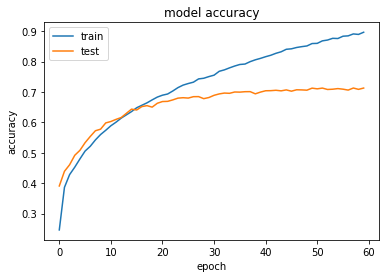

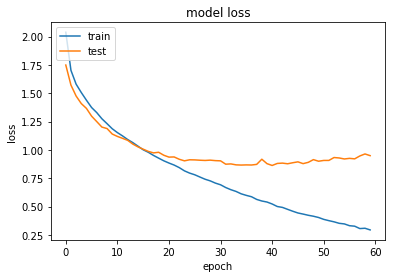

In [0]:
# summarize history for accuracy
plt.plot(train_model5.history['acc'])
plt.plot(train_model5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model5.history['loss'])
plt.plot(train_model5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()